# IMPORTING LIBRARIES

In [69]:
import numpy as np #used to do operations on arrays
import pandas as pd #used for data manipulation on tables known as dataframes
import matplotlib.pyplot as plt #used for data visualization
%matplotlib inline 
# command ensures that the plot will be displayed directly in the Jupyter Notebook.
import seaborn as sns #used for making charts and graphs for data visualization

In [70]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

`df` is reading the file and `unicode_escape` is used to avoid the encoding error which can come during the file reading.


In [71]:
df.shape 

(11251, 15)

`df.shape` is used to show the total number of rows and columns


In [72]:
df.head() 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


`df.head()` is a function that returns the top 5 rows by default. If I want to customize the number of rows returned, I can simply pass an integer as a parameter.

```python
# For example, to return the top 10 rows:
df.head(10)
```


# DATA CLEANING PROCESS


In [73]:
df.info() #gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [74]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

`df.drop` is used to remove the columns `Status` and `unnamed1` from the DataFrame. 

The `axis=1` parameter indicates that I am dropping columns (not rows) because these two columns are empty, and `inplace=True` modifies the DataFrame directly without needing to assign the result to a new variable.

// `axis = 0` refers to rows

// `axis  = 1` refers to columns


In [75]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

`pd.isnull(df).sum()` is used to identify and count the number of missing values in each column of the DataFrame. The `pd.isnull(df)` part returns a DataFrame of the same shape as `df` with `True` for NaN (Not a Number) values and `False` otherwise. The `.sum()` part then sums up these `True` values (counting them as 1) along each column, giving the total count of missing values per column.

In the above output of Amount is 12, which means there are 12 null values in Amount Column

In [76]:
df.dropna(inplace=True)

`df.dropna(inplace=True)` is used to remove rows that contain any missing values from the DataFrame.
 
The `inplace=True` parameter modifies the DataFrame directly without needing to assign the result to a new variable.

# Exploratory Data Analysis (EDA)

**Gender**

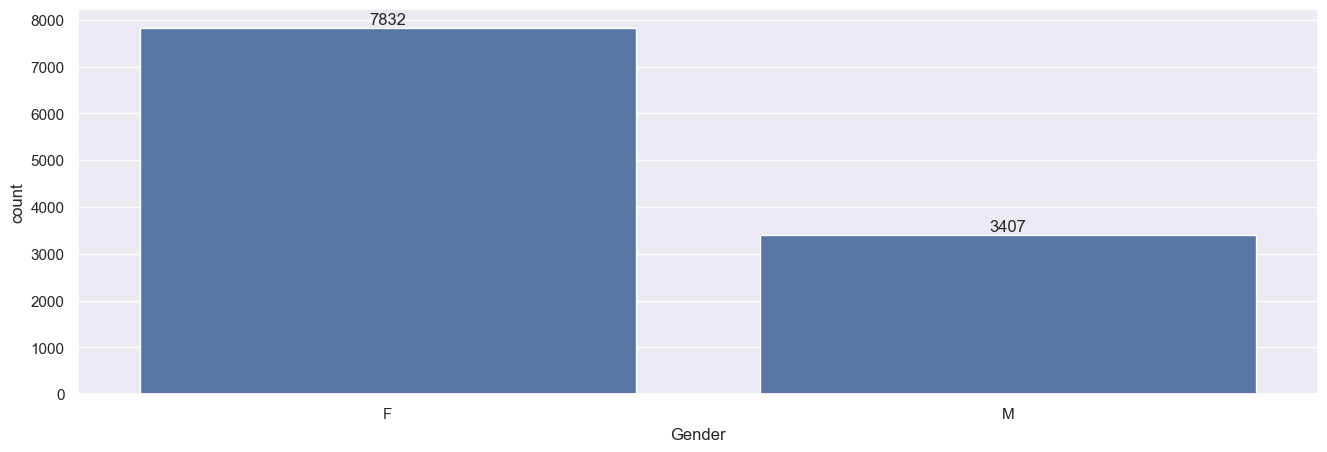

In [77]:
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars) # type: ignore

`ax = sns.countplot(x='Gender', data=df)` creates a count plot that visualizes the distribution of values in the 'Gender' column from the DataFrame `df`.

- `x='Gender'` specifies that the count plot should use the 'Gender' column for the x-axis.
- `data=df` provides the DataFrame `df` as the data source for the plot.

The `for bars in ax.containers` loop iterates over the bar containers in the plot.

`ax.bar_label(bars)` adds labels on top of each bar to display the count values directly on the plot.


<Axes: xlabel='Gender', ylabel='Amount'>

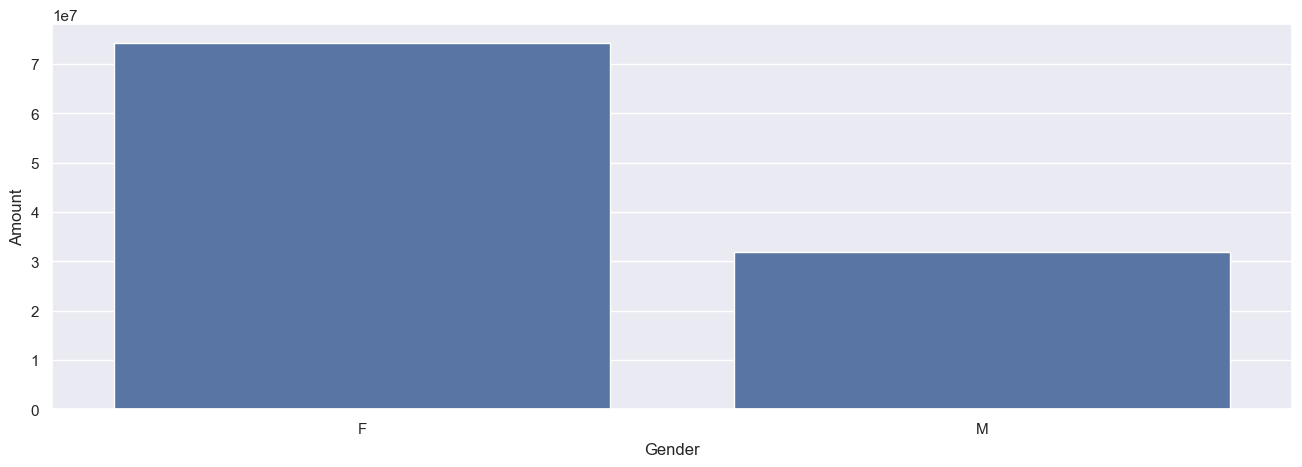

In [78]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) # type: ignore

sns.barplot(x='Gender',y='Amount',data=sales_gen)

`sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)` groups the DataFrame `df` by the 'Gender' column and calculates the total 'Amount' for each gender. The result is then sorted in descending order by the 'Amount'.

- `as_index=False` ensures that 'Gender' remains a column rather than becoming the index.
- `.sum()` calculates the total amount for each gender.
- `.sort_values(by='Amount', ascending=False)` sorts the resulting DataFrame by 'Amount' in descending order.

`sns.barplot(x='Gender', y='Amount', data=sales_gen)` creates a bar plot to visualize the total 'Amount' for each 'Gender' using the DataFrame `sales_gen`.

- `x='Gender'` sets the x-axis to the 'Gender' column.
- `y='Amount'` sets the y-axis to the 'Amount' column.
- `data=sales_gen` provides the DataFrame `sales_gen` as the data source for the plot.

***From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men***

**Age**

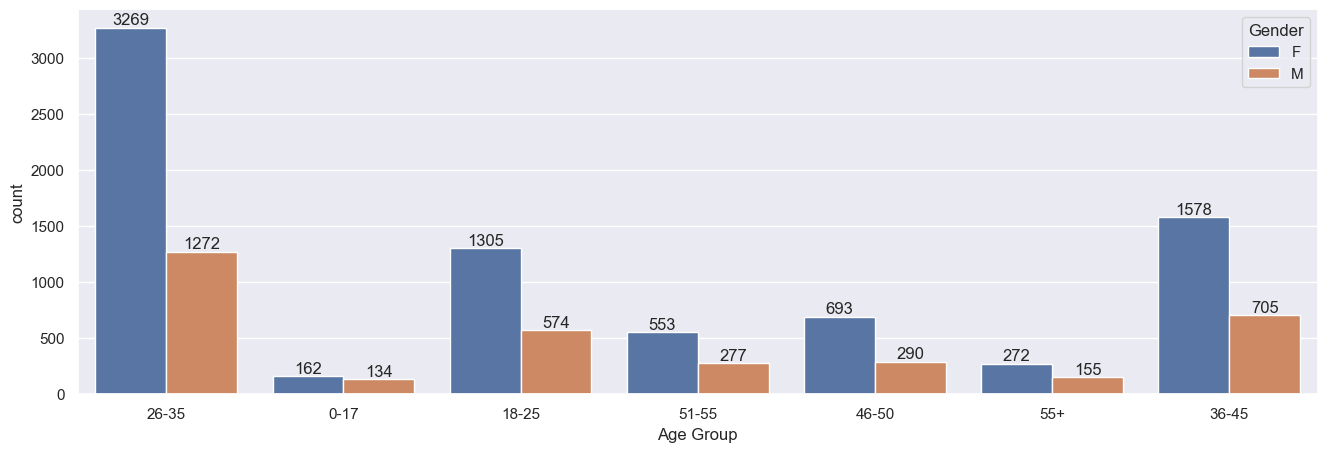

In [79]:
ax = sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
  ax.bar_label(bars) # type: ignore

`ax = sns.countplot(data=df, x='Age Group', hue='Gender')` creates a count plot that shows the distribution of 'Age Group' values, with different colors representing different 'Gender' categories.

- `data = df` specifies the DataFrame `df` as the data source.
- `x = 'Age Group'` sets the x-axis to the 'Age Group' column.
- `hue = 'Gender'` uses different colors to represent different 'Gender' categories.

The `for bars in ax.containers` loop iterates over the containers of bars in the plot.

`ax.bar_label(bars)` adds labels on top of each bar to display the count values directly on the plot.


<Axes: xlabel='Age Group', ylabel='Amount'>

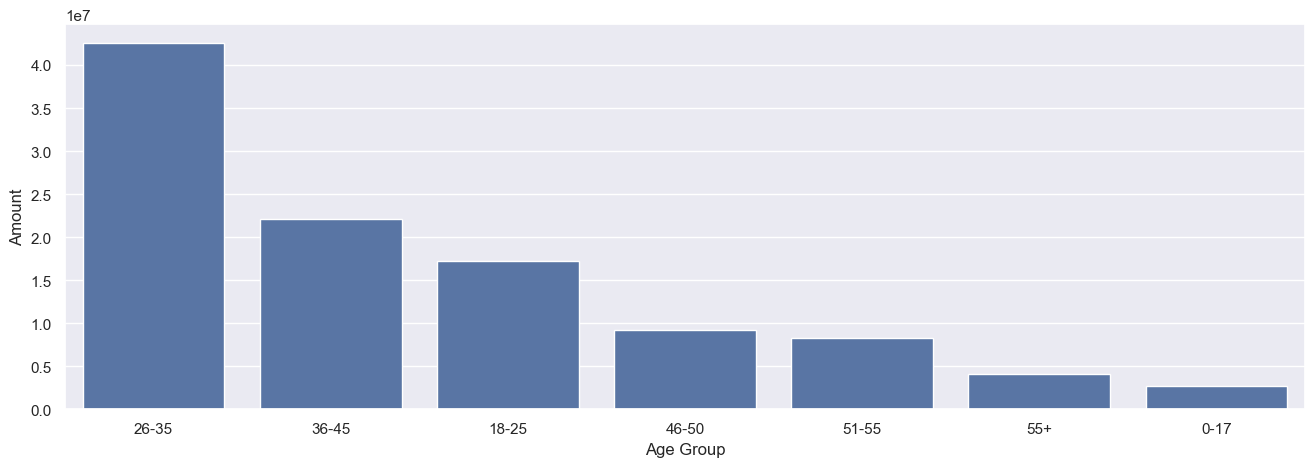

In [80]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) # type: ignore

sns.barplot(x='Age Group',y='Amount',data=sales_age)

`sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)` groups the DataFrame `df` by 'Age Group', calculates the total 'Amount' for each age group, and sorts the results in descending order by the 'Amount'.

- `groupby(['Age Group'], as_index=False)` groups the data by 'Age Group' and keeps 'Age Group' as a column in the resulting DataFrame.
- `['Amount'].sum()` calculates the total 'Amount' for each age group.
- `.sort_values(by='Amount', ascending=False)` sorts the DataFrame by 'Amount' in descending order.

`sns.barplot(x='Age Group', y='Amount', data=sales_age)` creates a bar plot with:

- `x='Age Group'` setting the x-axis to the 'Age Group' column.
- `y='Amount'` setting the y-axis to the 'Amount' column.
- `data=sales_age` using the sorted DataFrame `sales_age` as the data source for the plot.

***From above graphs we can see that most of the buyers are of age group between 26-35 yrs female***

**State**

<Axes: xlabel='State', ylabel='Amount'>

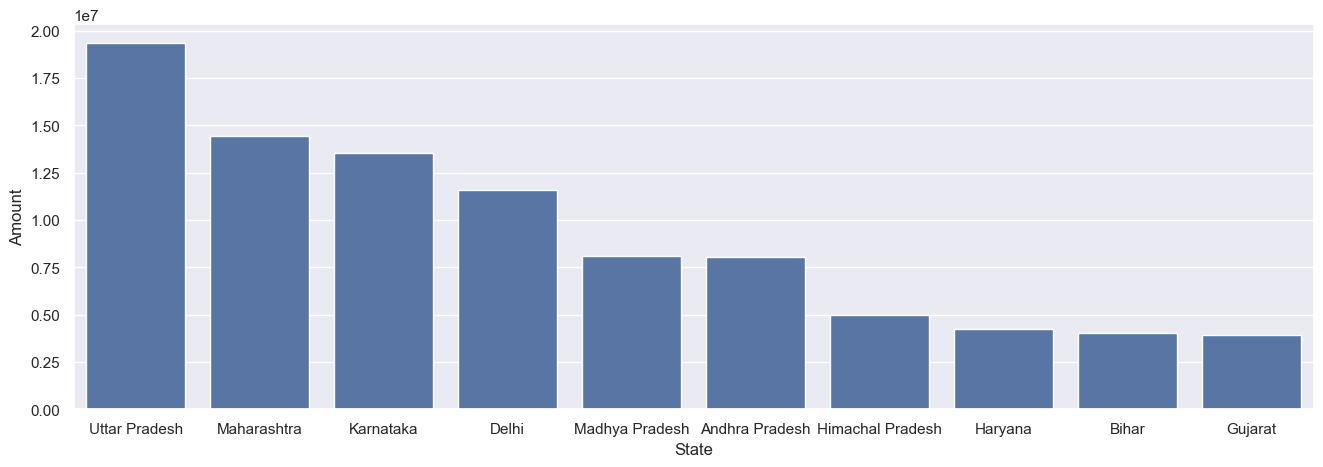

In [81]:
# Top 10 states by Amount
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10) # type: ignore

sns.set_theme(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

<Axes: xlabel='State', ylabel='Orders'>

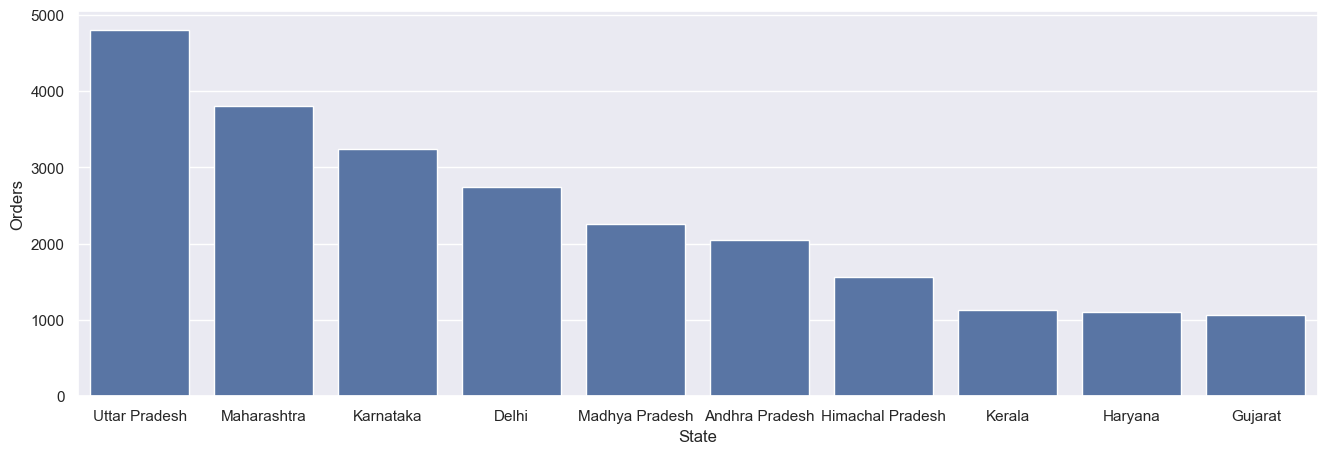

In [82]:
# Top 10 states by Orders
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10) # type: ignore

sns.set_theme(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

***From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively***

**Marital Status**

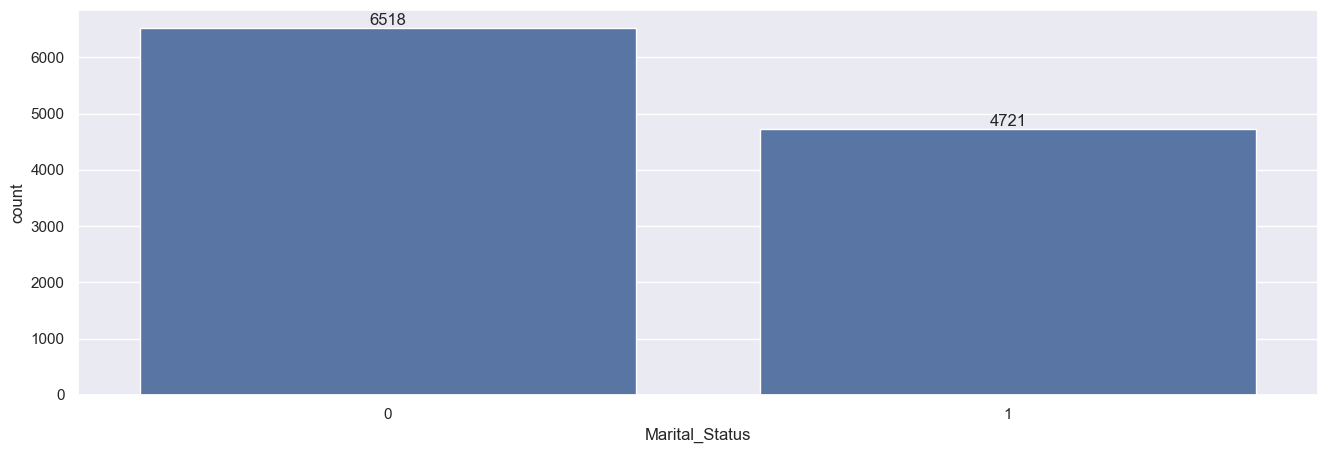

In [83]:
ax = sns.countplot(data=df,x='Marital_Status')

for bars in ax.containers:
  ax.bar_label(bars) # type: ignore

<Axes: xlabel='Marital_Status', ylabel='Amount'>

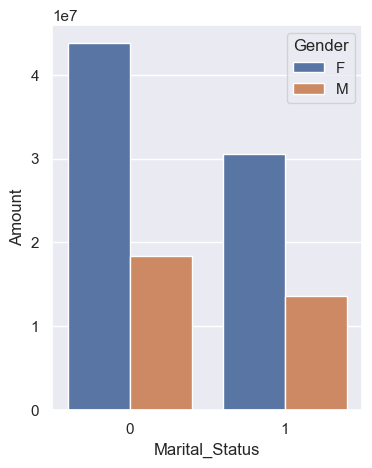

In [84]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) # type: ignore

sns.set_theme(rc={'figure.figsize':(4,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

***From above graphs we can see that most of the buyers are married (women) and they have high purchasing power***

**Occupation**

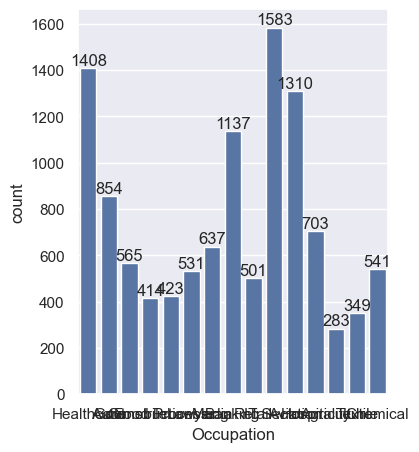

In [85]:
ax = sns.countplot(data=df,x='Occupation')

sns.set_theme(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars) # type: ignore 

<Axes: xlabel='Occupation', ylabel='Amount'>

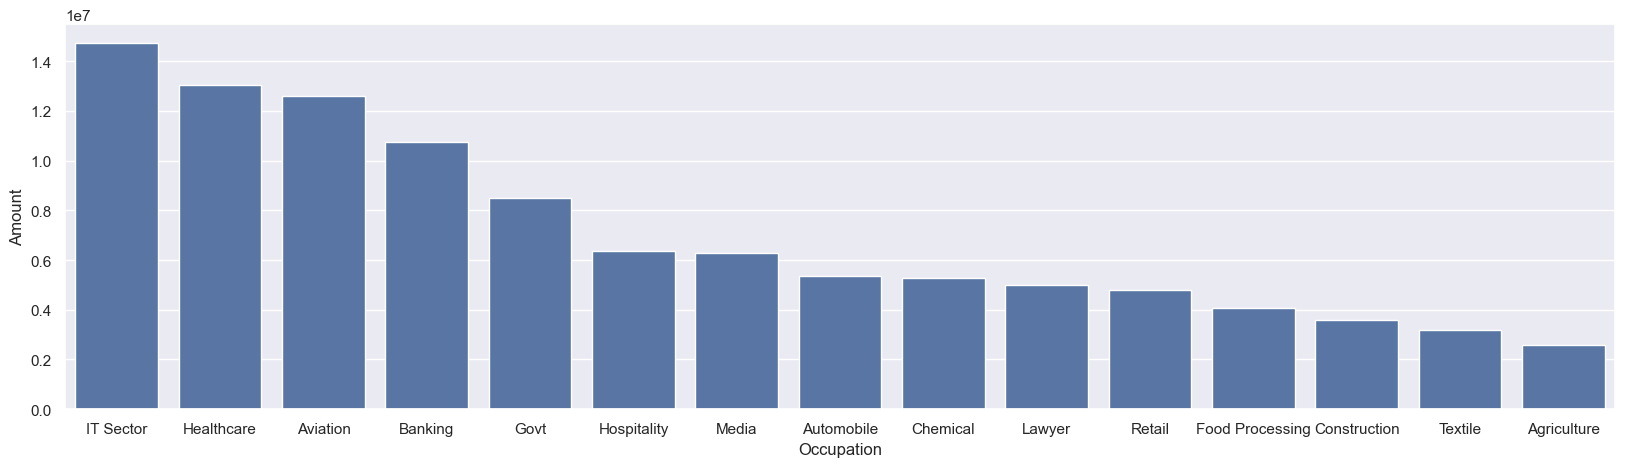

In [86]:
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) # type: ignore

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

***From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector***

**Product Catergory**

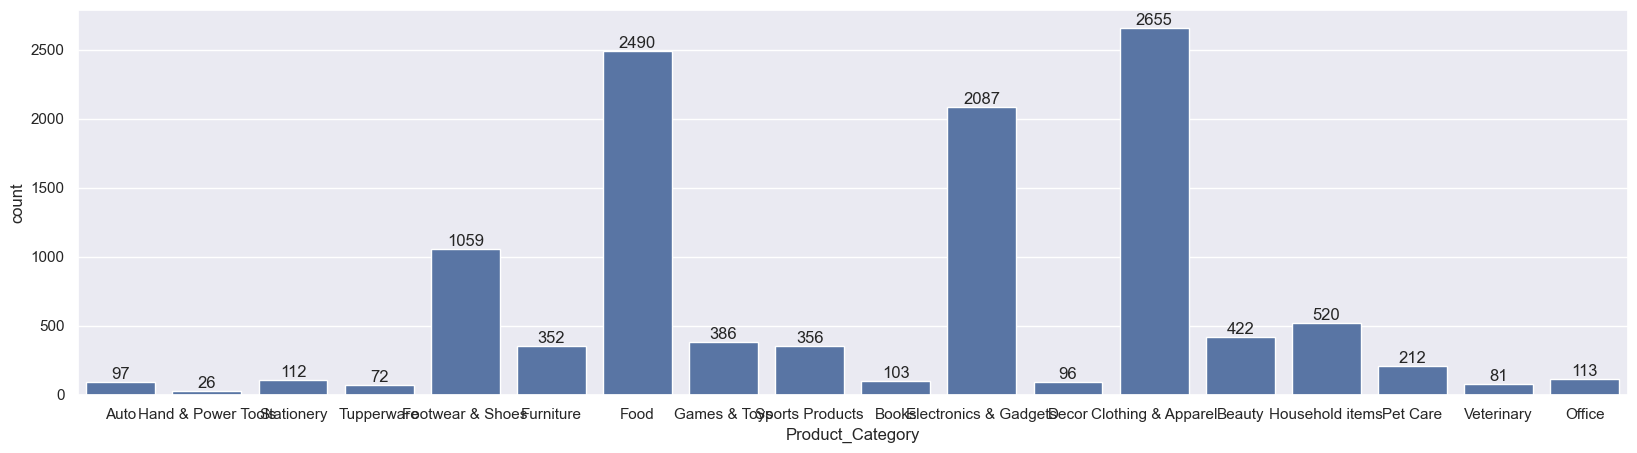

In [87]:
ax = sns.countplot(data=df,x='Product_Category')

sns.set_theme(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars) # type: ignore

***From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category***

<Axes: xlabel='Product_ID', ylabel='Orders'>

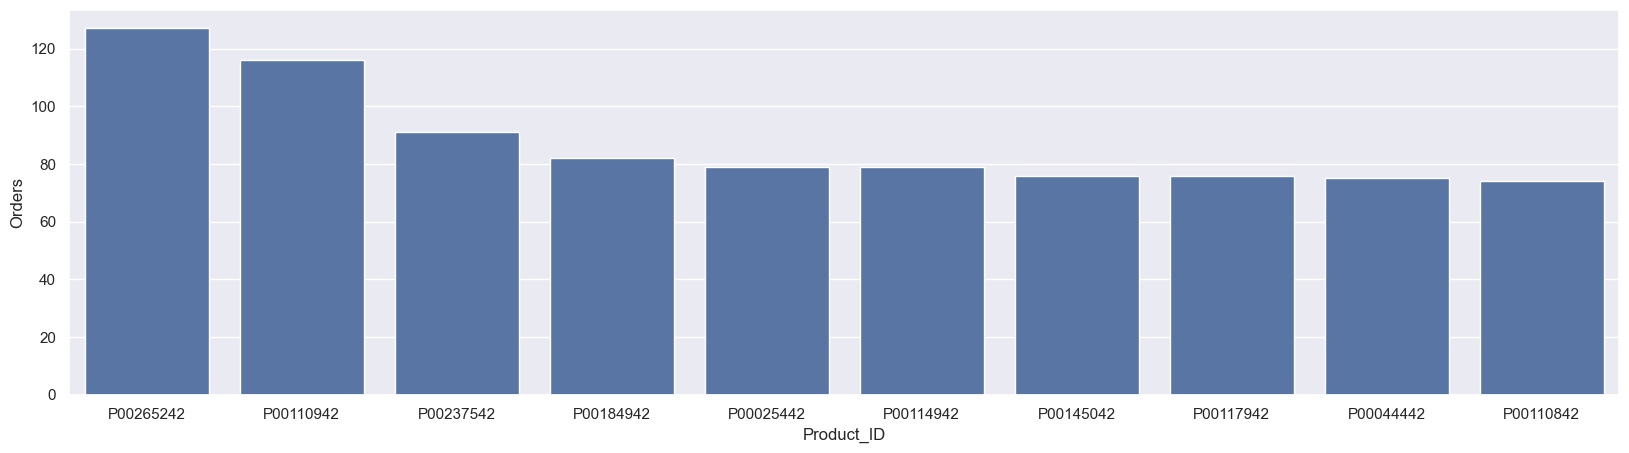

In [88]:
# Top 10 most sold products
sales_state = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10) # type: ignore

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

# CONCLUSION :

***Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category***